<a href="https://colab.research.google.com/github/rightchel/mirea-hi/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import warnings

# Игнорировать предупреждения
warnings.filterwarnings('ignore')

# Визуализация данных. Seaborn

In [ ]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

В таблице covid_df создадим признаки

* death_rate — общий процент смертей среди зафиксированных случаев (летальность)
* recover_rate — общий процент случаев выздоровления.

Данные характеристики рассчитаем как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) умноженные на 100%.

In [ ]:
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100

In [ ]:
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Теперь в нашем датасете следующие основные переменные:

* date — дата наблюдения;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как people_vaccinated/population*100);
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
* people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как people_fully_vaccinated/population*100);
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране;
* death_rate — общий процент смертей среди зафиксированных случаев (летальность);
* recover_rate — общий процент случаев выздоровления.

## <center> Графические возможности библиотеки seaborn
    

Seaborn - надстройка над библиотекой matplotlib, которая расширяет ее возможности, позволяя создавать графики более высокого уровня с оформлением.

In [ ]:
#!pip install seaborn

Традиционно seaborn импортируется под псевдонимом sns:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.13.2'

Сравним несколько стран. Создадим специальный DataFrame croped_covid_df для этих данных.

Для того, чтобы показатели по странам стали сопоставимы: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек населения (заболеваемость в процентах от населения):

In [ ]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


## Гистограмма
### Метод histplot().
Параметры:
* **data** - DataFrame, по которому строим график
* **x** - признак, который будет отложен по оси абсцисс
* **y** - признак, который будет отображаться по оси ординат
* **hue** - группировочный категориальный признак: позволяет строить отдельный график для каждой категории (не стоит использовать для гистограмм)
* **ax** - система координат matplotlib, в которой строится график
* **color**- цвет графика
* **bins** - число столбцов в гистограмме
* **kde** - параметр указывает, сглаживать ли гистограмму кривой (по умолчанию False)



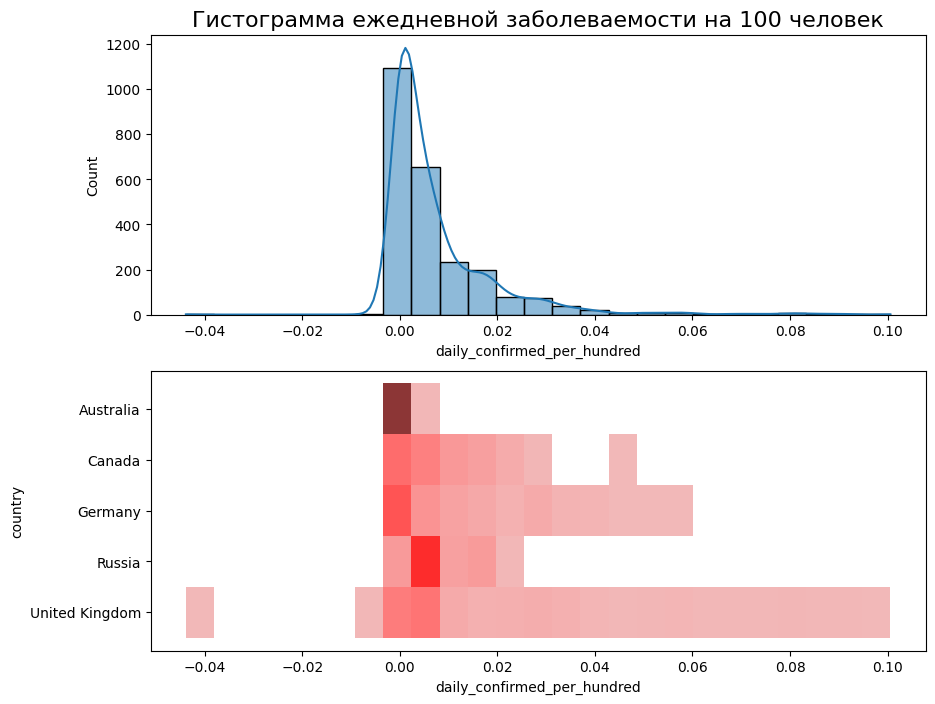

In [ ]:
# Создаем фигуру и оси для двух подграфиков, располагая их вертикально (2 строки, 1 столбец)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Строим гистограмму для ежедневной заболеваемости на 100 человек
sns.histplot(
    data=croped_covid_df,  # Используем данные из DataFrame croped_covid_df
    x='daily_confirmed_per_hundred',  # Переменная, которую будем отображать на оси X
    bins=25,
    kde=True,  # Включаем график кривой сглаживания
    ax=axes[0]  # Указываем, что гистограмма будет отображена на первом подграфике
)

# Устанавливаем заголовок для первого подграфика
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

# Строим гистограмму для ежедневной заболеваемости на 100 человек по странам
sns.histplot(
    data=croped_covid_df,  # Используем те же данные
    x='daily_confirmed_per_hundred',  # Переменная на оси X
    y='country',  # Переменная на оси Y (страны)
    bins=25,  # Количество корзин для этой гистограммы
    color='red',  # Устанавливаем цвет гистограммы в красный
    ax=axes[1]  # Указываем, что этот график будет отображен на втором подграфике
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0.
Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании.

На самом деле при использовании Seaborn необязательно передавать координатные плоскости в аргументы функций. Графики в библиотеке вполне себе самодостаточны: функции для построения графика возвращают объект Axes из библиотеки Matplotlib, с которыми мы уже умеем работать. Достаточно просто занести результат выполнения функции в переменную и использовать её для настройки графика.

### boxplot()

Построим коробчатые диаграммы признака летальности (death_rate).

Коробчатые диаграммы в seaborn строятся с помощью метода **boxplot()**.
Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y - страны)

* orient - ориентация диаграммы,
* width - ширина коробок


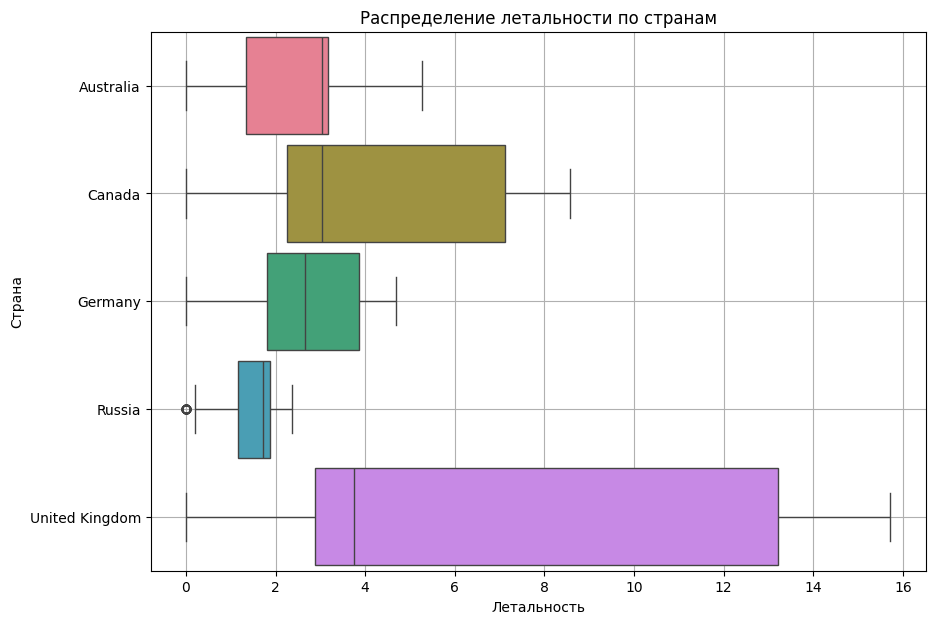

In [ ]:
# Задайте палитру цветов (можно указать свои цвета)
palette = sns.color_palette("husl", len(croped_covid_df['country'].unique()))

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9, # ширина каждого бокса будет составлять 90% от пространства, отведенного для каждого уникального значения по оси Y (в данном случае, для каждой страны)
    palette=palette,

)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако судя по тому, что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

### barplot()

Многоуровневая столбчатая диаграмма на примере  среднего ежедневного процента заболевших в странах по кварталам.

Метод **barplot()**

По умолчанию: среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator).
Добавление многоуровневости: hue (позволяет группировать данные по признаку)


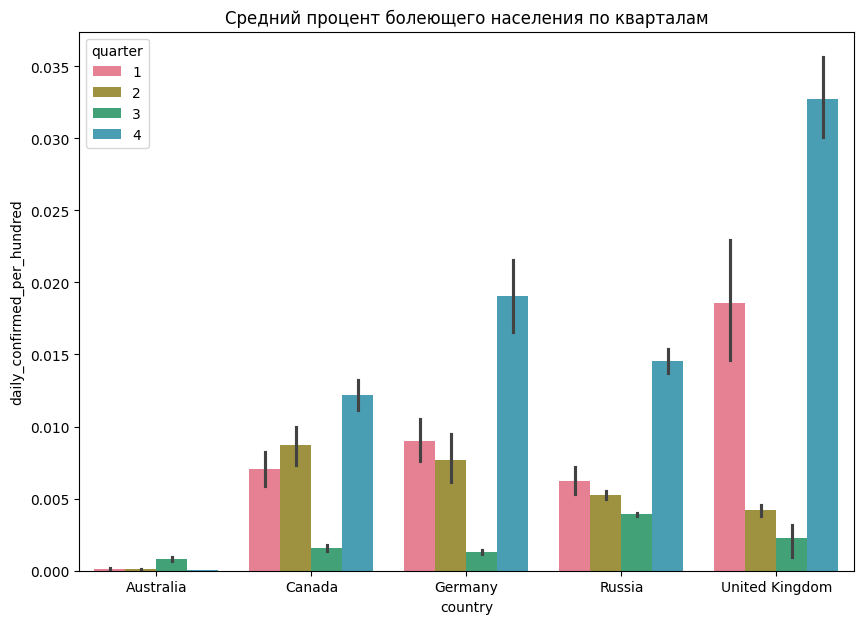

In [ ]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
    palette=palette,
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

### joinplot()

Построим **joinplot** на зависимость ежедневной заболеваемости в странах в проценте от населения (daily_confirmed_per_hundred) от числа полностью вакцинированных (**people_fully_vaccinated_per_hundred**)


Параметры

* **xlim** и **ylim**: диапазон отображения осей x и y

* **height**: высота и ширина графика (он квадратный)


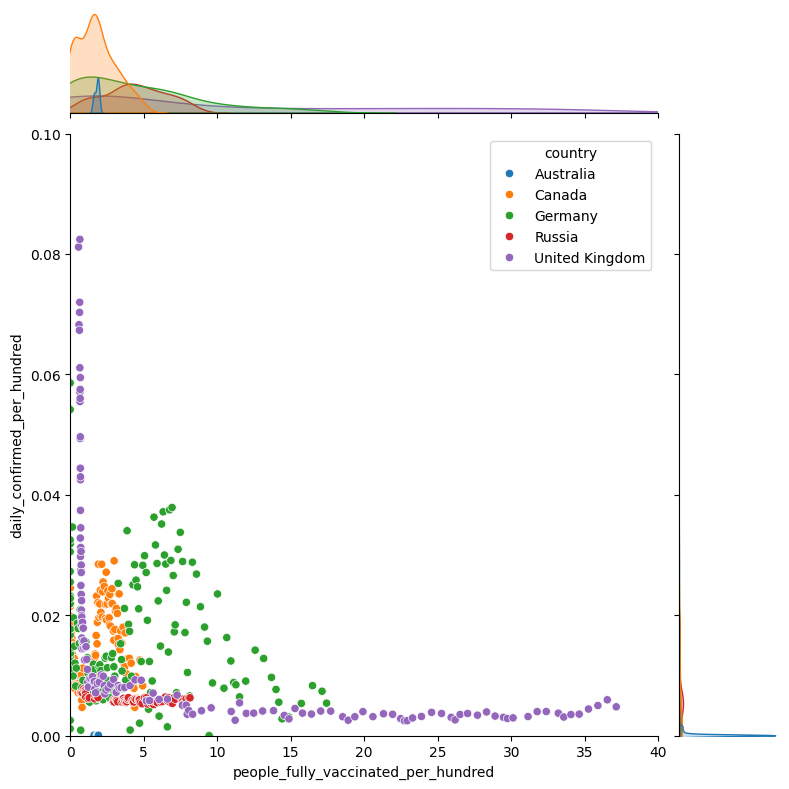

In [ ]:
jointplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
);

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Создадим сводную таблицу: по столбцам отложим признак даты, а по строкам - страны, в ячейках таблицы будет находиться процент вакцинированных людей (1-ым компонентом) в стране на определенный день. Для того, чтобы даты отображались на тепловой карте верно, их необходимо привести к типу "string".


In [ ]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в seaborn используется метод heatmap(). Метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета.
* **annot** - отображение легенды
* **cmap** - цветовая гамма графика


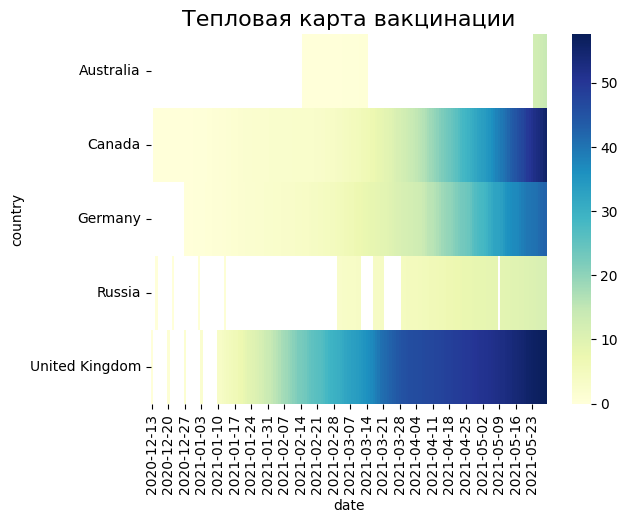

In [ ]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения в начале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

# Задания

1. Создайте новый признак **confirmed_per_hundred**, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
2. Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.Сделайте выводы по графику.
3. Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).Сделайте выводы по графику.


In [2]:
#1
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

covid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/covid_df.csv')
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed'] / croped_covid_df['population']) * 100

Mounted at /content/drive


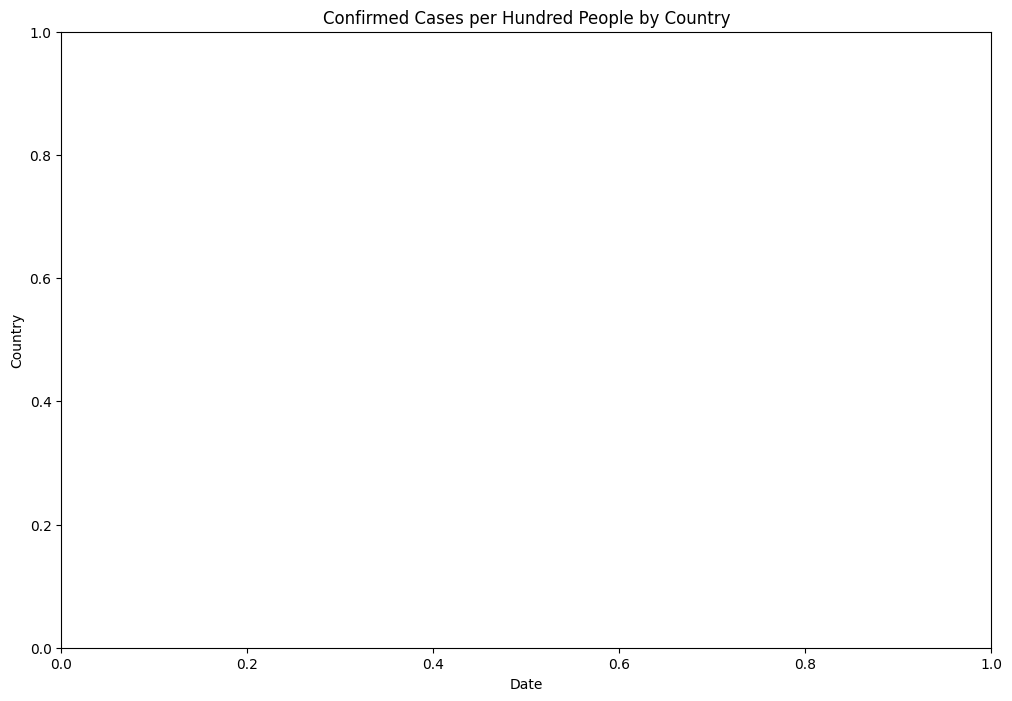

In [18]:
#2
import seaborn as sns
import matplotlib.pyplot as plt

#heatmap_data = croped_covid_df.pivot("country",'date', "confirmed_per_hundred")

plt.figure(figsize=(12, 8))
#sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title('Confirmed Cases per Hundred People by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()

In [1]:
#3
croped_covid_df['recover_rate'] = (croped_covid_df['recovered'] / croped_covid_df['confirmed']) * 100


plt.figure(figsize=(10, 6))
sns.boxplot(x=croped_covid_df['recover_rate'])
plt.title('Recovery Rate Boxplot')
plt.xlabel('Recovery Rate (%)')
plt.show()

NameError: name 'croped_covid_df' is not defined